In [8]:
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns 
import smogn 
import gym
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.io as pio
import metallurgy
pio.renderers.default = "plotly_mimetype+notebook"
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ss=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\steel_strength(now).csv", sep=',', encoding='unicode_escape') ## encoding='unicode_escape'
ss.shape

(312, 17)

In [10]:
ss['fe'] = 100 - ss[['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']].sum(axis=1)
print(ss)

                                               formula     c    mn    si  \
0    Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...  0.02  0.05  0.05   
1    Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....  0.18  0.01  0.01   
2    Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....  0.00  0.01  0.01   
3    Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...  0.01  0.05  0.05   
4    Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...  0.01  0.05  0.05   
..                                                 ...   ...   ...   ...   
307  Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...  0.38  0.18  0.01   
308  Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....  0.00  0.06  0.05   
309  Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...  0.37  0.17  0.01   
310  Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...  0.41  0.19  0.01   
311  Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0....  0.27  0.27  0.01   

        cr     ni    mo     v     n    nb     co     w    al    ti  \
0     0.01  19.70

In [11]:
col = ss.pop('fe')
ss.insert(1,col.name,col)

In [12]:
ss.head()

,formula,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [13]:
ss = ss.fillna(0)
ss.head(313)

,formula,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,0.0
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...,82.48,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00,1722.5,1998.1,5.0
308,Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....,81.19,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09,1019.0,1019.0,19.0
309,Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...,81.53,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00,1860.3,2156.6,3.0
310,Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...,85.57,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00,1812.1,2087.7,2.0


In [14]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   formula           312 non-null    object 
 1   fe                312 non-null    float64
 2   c                 312 non-null    float64
 3   mn                312 non-null    float64
 4   si                312 non-null    float64
 5   cr                312 non-null    float64
 6   ni                312 non-null    float64
 7   mo                312 non-null    float64
 8   v                 312 non-null    float64
 9   n                 312 non-null    float64
 10  nb                312 non-null    float64
 11  co                312 non-null    float64
 12  w                 312 non-null    float64
 13  al                312 non-null    float64
 14  ti                312 non-null    float64
 15  yield strength    312 non-null    float64
 16  tensile strength  312 non-null    float64
 1

In [15]:
ss.columns

Index(['formula', 'fe', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb',
       'co', 'w', 'al', 'ti', 'yield strength', 'tensile strength',
       'elongation'],
      dtype='object')

<Axes: >

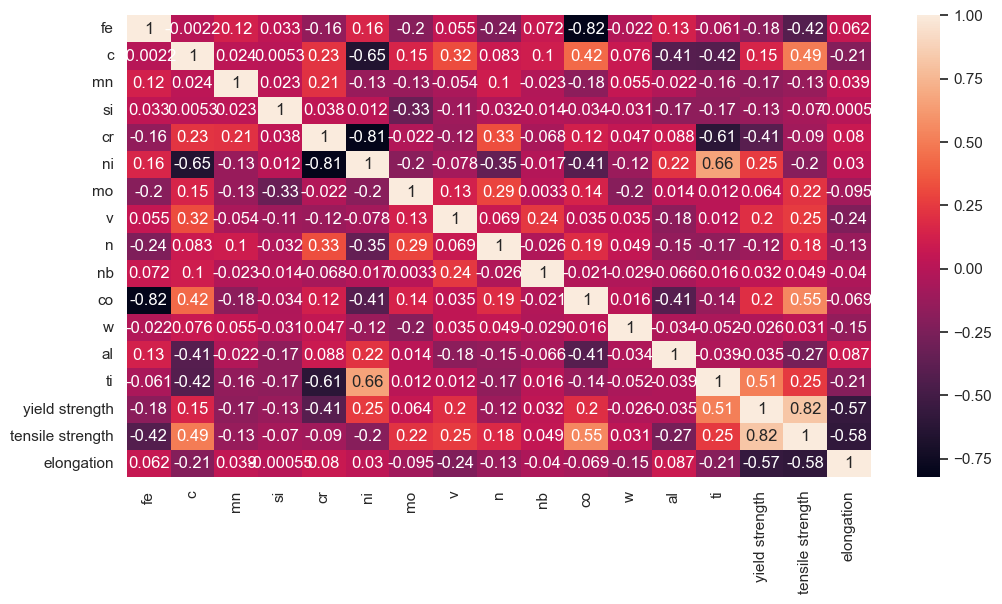

In [16]:
ssd=ss.drop(['formula'], axis=1)
plt.figure(figsize=(12,6))
sns.heatmap(ssd.corr(), annot=True)

Data Shape=  (312, 14)
epoch: 0 | Train Loss: 1667.0374 | Test Loss (MAE): 1579.9351
epoch: 1000 | Train Loss: 1425.7925 | Test Loss (MAE): 1514.2563
epoch: 2000 | Train Loss: 1418.0345 | Test Loss (MAE): 1506.2665
epoch: 3000 | Train Loss: 1409.9283 | Test Loss (MAE): 1497.0753
epoch: 4000 | Train Loss: 1401.7339 | Test Loss (MAE): 1487.7292
epoch: 5000 | Train Loss: 1393.4972 | Test Loss (MAE): 1476.7058
epoch: 6000 | Train Loss: 1385.2478 | Test Loss (MAE): 1468.1147
epoch: 7000 | Train Loss: 1376.9871 | Test Loss (MAE): 1459.5685
epoch: 8000 | Train Loss: 1368.7374 | Test Loss (MAE): 1449.9609
epoch: 9000 | Train Loss: 1360.4851 | Test Loss (MAE): 1440.2189
epoch: 10000 | Train Loss: 1352.2306 | Test Loss (MAE): 1430.8574
epoch: 11000 | Train Loss: 1343.9734 | Test Loss (MAE): 1421.2131
epoch: 12000 | Train Loss: 1335.7153 | Test Loss (MAE): 1412.3529
epoch: 13000 | Train Loss: 1327.4584 | Test Loss (MAE): 1403.0975
epoch: 14000 | Train Loss: 1319.2024 | Test Loss (MAE): 1393.0903


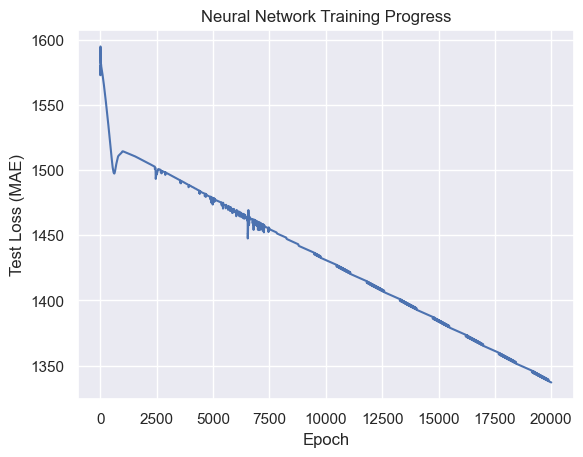

Neural Network R2 score = -28.558555603027344


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare data (assuming 'ssd' DataFrame is defined)
Xnn = ssd.drop(['tensile strength', 'yield strength', 'elongation'], axis=1)
ynn = ssd["tensile strength"].to_numpy()
print('Data Shape= ', Xnn.shape)

# Train-test split
X_train_raw, X_test_raw, y_trainn, y_testn = train_test_split(Xnn, ynn, test_size=0.3, random_state=51)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train_raw)
X_test = sc.transform(X_test_raw)

# Reshape data for RNN (add sequence dimension)
# Assuming seq_length of 1 for each sample (if you have a sequence, adjust seq_length accordingly)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert to PyTorch tensors
X_train_nn = torch.tensor(X_train_rnn, dtype=torch.float32)
y_train_nn = torch.tensor(y_trainn, dtype=torch.float32).reshape(-1, 1)
X_test_nn = torch.tensor(X_test_rnn, dtype=torch.float32)
y_test_nn = torch.tensor(y_testn, dtype=torch.float32).reshape(-1, 1)

# Define RNN Model
class RNNHardnessModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNHardnessModel, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, 
                          hidden_size=hidden_size, 
                          num_layers=num_layers, 
                          batch_first=True)  # batch_first=True for (batch_size, seq_length, input_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x: (batch_size, seq_length, input_size)
        out, _ = self.rnn(x)  # out: (batch_size, seq_length, hidden_size)
        out = out[:, -1, :]  # Use the output of the last time step
        out = self.fc(out)  # (batch_size, output_size)
        return out

# Initialize model
input_size = X_train_rnn.shape[2]
hidden_size = 300
num_layers = 20
output_size = 1
model = RNNHardnessModel(input_size, hidden_size, num_layers, output_size)

# Loss function and optimizer
lossfn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
datalist1 = []
epochs = 20001

for epoch in range(epochs):
    model.train()
    ypred = model(X_train_nn)
    loss = lossfn(ypred, y_train_nn)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        testpred = model(X_test_nn)
        testloss = lossfn(testpred, y_test_nn)
        datalist1.append(testloss.item())
    
    if epoch % 1000 == 0:
        print(f"epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss (MAE): {testloss.item():.4f}")

# Plot test loss over epochs
plt.figure()
plt.plot(range(len(datalist1)), datalist1)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MAE)')
plt.title('Neural Network Training Progress')
plt.show()

# Optionally save the plot
# plt.savefig('RNN_Hardness_Pred.png')

# Evaluation metric (R2 score)
testpred_np = testpred.numpy()
y_test_nn_np = y_test_nn.numpy()
nn_r2_score = r2_score(y_test_nn_np, testpred_np)
print("Neural Network R2 score =", nn_r2_score)

Data Shape=  (312, 14)
epoch: 0 | Train Loss: 1641.4233 | Test Loss (MAE): 1657.9744
epoch: 1000 | Train Loss: 723.9431 | Test Loss (MAE): 740.3252
epoch: 2000 | Train Loss: 312.4147 | Test Loss (MAE): 242.1750
epoch: 3000 | Train Loss: 198.2906 | Test Loss (MAE): 204.5985
epoch: 4000 | Train Loss: 192.6527 | Test Loss (MAE): 98.8989
epoch: 5000 | Train Loss: 191.9488 | Test Loss (MAE): 104.9709
epoch: 6000 | Train Loss: 207.7142 | Test Loss (MAE): 182.3579
epoch: 7000 | Train Loss: 204.6558 | Test Loss (MAE): 175.5193
epoch: 8000 | Train Loss: 208.8555 | Test Loss (MAE): 287.2142


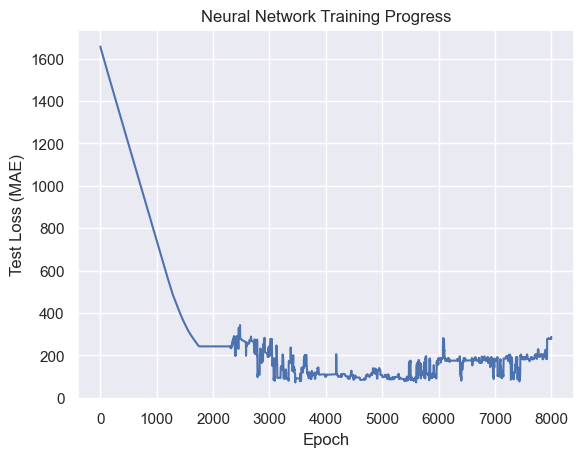

Neural Network R2 score = -0.8283958435058594
Mean Absolute Error = 287.2142


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare data (assuming 'ssd' DataFrame is defined)
Xnn = ssd.drop(['tensile strength', 'yield strength', 'elongation'], axis=1)
ynn = ssd["tensile strength"].to_numpy()
print('Data Shape= ', Xnn.shape)

# Train-test split
X_train_raw, X_test_raw, y_trainn, y_testn = train_test_split(Xnn, ynn, test_size=0.01, random_state=101)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train_raw)
X_test = sc.transform(X_test_raw)

# Reshape data for RNN (add sequence dimension)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert to PyTorch tensors
X_train_nn = torch.tensor(X_train_rnn, dtype=torch.float32)
y_train_nn = torch.tensor(y_trainn, dtype=torch.float32).reshape(-1, 1)
X_test_nn = torch.tensor(X_test_rnn, dtype=torch.float32)
y_test_nn = torch.tensor(y_testn, dtype=torch.float32).reshape(-1, 1)

# Define RNN Model with Dropout
class RNNHardnessModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(RNNHardnessModel, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, 
                          hidden_size=hidden_size, 
                          num_layers=num_layers, 
                          batch_first=True,
                          dropout=dropout_prob)  # Dropout in RNN
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # Use the output of the last time step
        out = self.fc(out)
        return out

# Initialize model
input_size = X_train_rnn.shape[2]
hidden_size = 90
num_layers = 10
output_size = 1
dropout_prob = 0.5  # Example dropout probability
model = RNNHardnessModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

# Loss function and optimizer
lossfn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
datalist1 = []
epochs = 20001

for epoch in range(epochs):
    model.train()
    ypred = model(X_train_nn)
    loss = lossfn(ypred, y_train_nn)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        testpred = model(X_test_nn)
        testloss = lossfn(testpred, y_test_nn)
        datalist1.append(testloss.item())
    
    if epoch % 1000 == 0:
        print(f"epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss (MAE): {testloss.item():.4f}")

# Plot test loss over epochs
plt.figure()
plt.plot(range(len(datalist1)), datalist1)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MAE)')
plt.title('Neural Network Training Progress')
plt.show()

# Convert predictions and targets to NumPy arrays
testpred_np = testpred.numpy()
y_test_nn_np = y_test_nn.numpy()

# Evaluation metrics
nn_r2_score = r2_score(y_test_nn_np, testpred_np)
print("Neural Network R2 score =", nn_r2_score)

# Optional: Check mean absolute error
mae = mean_absolute_error(y_test_nn_np, testpred_np)
print("Mean Absolute Error =", mae)


## ANN model 1

Data Shape=  (312, 14)
epoch: 0 | Train Loss: 1637.5690 | Test Loss (MAE): 1675.9612
epoch: 100 | Train Loss: 343.3525 | Test Loss (MAE): 261.7513
epoch: 200 | Train Loss: 192.9383 | Test Loss (MAE): 172.0782
epoch: 300 | Train Loss: 162.7930 | Test Loss (MAE): 157.2245
epoch: 400 | Train Loss: 165.3542 | Test Loss (MAE): 153.1043
epoch: 500 | Train Loss: 161.5595 | Test Loss (MAE): 142.4430
epoch: 600 | Train Loss: 164.8156 | Test Loss (MAE): 141.6716
epoch: 700 | Train Loss: 155.8998 | Test Loss (MAE): 138.3480
epoch: 800 | Train Loss: 154.0708 | Test Loss (MAE): 134.0846
epoch: 900 | Train Loss: 155.0879 | Test Loss (MAE): 135.3857
epoch: 1000 | Train Loss: 145.5834 | Test Loss (MAE): 129.1501
epoch: 1100 | Train Loss: 153.4711 | Test Loss (MAE): 130.3870
epoch: 1200 | Train Loss: 152.2312 | Test Loss (MAE): 126.7743
epoch: 1300 | Train Loss: 140.4152 | Test Loss (MAE): 125.7912
epoch: 1400 | Train Loss: 149.4139 | Test Loss (MAE): 129.2925
epoch: 1500 | Train Loss: 141.7142 | Test 

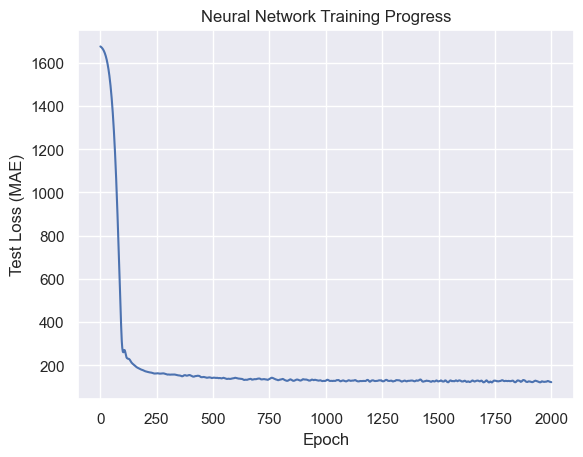

Neural Network R2 score = 0.7310832738876343
Mean Absolute Error = 121.724075


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare data (assuming 'ssd' DataFrame is defined)
Xnn = ssd.drop(['tensile strength', 'yield strength', 'elongation'], axis=1)
ynn = ssd["tensile strength"].to_numpy()
print('Data Shape= ', Xnn.shape)

# Train-test split
X_train_raw, X_test_raw, y_trainn, y_testn = train_test_split(Xnn, ynn, test_size=0.1, random_state=101)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train_raw)
X_test = sc.transform(X_test_raw)

# Convert to PyTorch tensors
X_train_nn = torch.tensor(X_train, dtype=torch.float32)
y_train_nn = torch.tensor(y_trainn, dtype=torch.float32).reshape(-1, 1)
X_test_nn = torch.tensor(X_test, dtype=torch.float32)
y_test_nn = torch.tensor(y_testn, dtype=torch.float32).reshape(-1, 1)

# Define ANN Model
class ANNHardnessModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ANNHardnessModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout after first hidden layer
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout after second hidden layer
        x = self.fc3(x)
        return x

# Initialize model
input_size = X_train.shape[1]  # Number of features
hidden_size1 = 500
hidden_size2 = 500
output_size = 1
model = ANNHardnessModel(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
lossfn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
datalist1 = []
epochs = 2001

for epoch in range(epochs):
    model.train()
    ypred = model(X_train_nn)
    loss = lossfn(ypred, y_train_nn)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        testpred = model(X_test_nn)
        testloss = lossfn(testpred, y_test_nn)
        datalist1.append(testloss.item())
    
    if epoch % 100 == 0:
        print(f"epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss (MAE): {testloss.item():.4f}")

# Plot test loss over epochs
plt.figure()
plt.plot(range(len(datalist1)), datalist1)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MAE)')
plt.title('Neural Network Training Progress')
plt.show()

# Convert predictions and targets to NumPy arrays
testpred_np = testpred.numpy()
y_test_nn_np = y_test_nn.numpy()

# Evaluation metrics
nn_r2_score = r2_score(y_test_nn_np, testpred_np)
print("Neural Network R2 score =", nn_r2_score)

# Optional: Check mean absolute error
mae = mean_absolute_error(y_test_nn_np, testpred_np)
print("Mean Absolute Error =", mae)

Data Shape=  (312, 14)
epoch: 0 | Train Loss: 1645.7172 | Test Loss (MAE): 1631.9462
epoch: 100 | Train Loss: 460.0266 | Test Loss (MAE): 231.8332
epoch: 200 | Train Loss: 403.9445 | Test Loss (MAE): 203.9011
epoch: 300 | Train Loss: 386.3677 | Test Loss (MAE): 225.2855
epoch: 400 | Train Loss: 419.3577 | Test Loss (MAE): 260.0882
epoch: 500 | Train Loss: 390.6246 | Test Loss (MAE): 251.3123
epoch: 600 | Train Loss: 409.0983 | Test Loss (MAE): 221.2581
epoch: 700 | Train Loss: 395.3105 | Test Loss (MAE): 161.6797
epoch: 800 | Train Loss: 400.7604 | Test Loss (MAE): 157.8345
epoch: 900 | Train Loss: 389.2671 | Test Loss (MAE): 223.4962
epoch: 1000 | Train Loss: 359.1373 | Test Loss (MAE): 255.3036
epoch: 1100 | Train Loss: 380.1789 | Test Loss (MAE): 302.3896
epoch: 1200 | Train Loss: 356.1527 | Test Loss (MAE): 253.8084
epoch: 1300 | Train Loss: 382.0705 | Test Loss (MAE): 267.4421
epoch: 1400 | Train Loss: 367.6302 | Test Loss (MAE): 301.0003
epoch: 1500 | Train Loss: 344.7395 | Test 

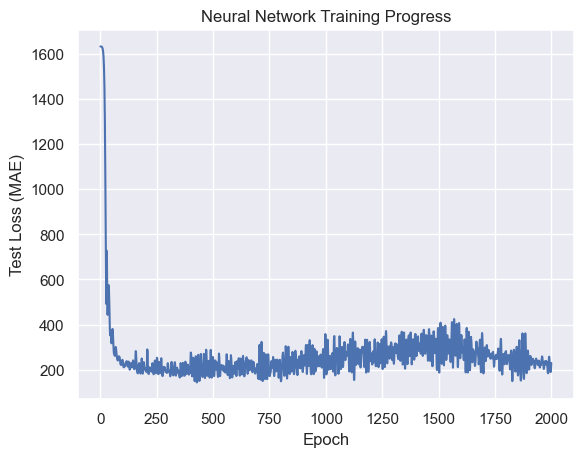

Neural Network R2 score = 0.3215640187263489
Mean Absolute Error = 229.85329


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare data (assuming 'ssd' DataFrame is defined)
Xnn = ssd.drop(['tensile strength', 'yield strength', 'elongation'], axis=1)
ynn = ssd["tensile strength"].to_numpy()
print('Data Shape= ', Xnn.shape)

# Train-test split
X_train_raw, X_test_raw, y_trainn, y_testn = train_test_split(Xnn, ynn, test_size=0.3, random_state=101)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train_raw)
X_test = sc.transform(X_test_raw)

# Convert to PyTorch tensors
X_train_nn = torch.tensor(X_train, dtype=torch.float32)
y_train_nn = torch.tensor(y_trainn, dtype=torch.float32).reshape(-1, 1)
X_test_nn = torch.tensor(X_test, dtype=torch.float32)
y_test_nn = torch.tensor(y_testn, dtype=torch.float32).reshape(-1, 1)

# Define ANN Model with more hidden layers
class ANNHardnessModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(ANNHardnessModel, self).__init__()
        self.layers = nn.ModuleList()
        
        # Input layer
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(p=0.5))
        
        # Hidden layers
        for i in range(len(hidden_sizes) - 1):
            self.layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(p=0.5))
        
        # Output layer
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Initialize model
input_size = X_train.shape[1]  # Number of features
hidden_sizes = [500,100,100,500,256,32]  # List of hidden layer sizes
output_size = 1
model = ANNHardnessModel(input_size, hidden_sizes, output_size)

# Loss function and optimizer
lossfn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
datalist1 = []
epochs = 2001

for epoch in range(epochs):
    model.train()
    ypred = model(X_train_nn)
    loss = lossfn(ypred, y_train_nn)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        testpred = model(X_test_nn)
        testloss = lossfn(testpred, y_test_nn)
        datalist1.append(testloss.item())
    
    if epoch % 100 == 0:
        print(f"epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss (MAE): {testloss.item():.4f}")

# Plot test loss over epochs
plt.figure()
plt.plot(range(len(datalist1)), datalist1)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MAE)')
plt.title('Neural Network Training Progress')
plt.show()

# Convert predictions and targets to NumPy arrays
testpred_np = testpred.numpy()
y_test_nn_np = y_test_nn.numpy()

# Evaluation metrics
nn_r2_score = r2_score(y_test_nn_np, testpred_np)
print("Neural Network R2 score =", nn_r2_score)

# Optional: Check mean absolute error
mae = mean_absolute_error(y_test_nn_np, testpred_np)
print("Mean Absolute Error =", mae)


## Lstm 

Data Shape=  (312, 14)
epoch: 0 | Train Loss: 1667.1228 | Test Loss (MAE): 1582.7361
epoch: 1000 | Train Loss: 1549.9509 | Test Loss (MAE): 1465.5559
epoch: 2000 | Train Loss: 1449.6510 | Test Loss (MAE): 1365.7111
epoch: 3000 | Train Loss: 1350.0172 | Test Loss (MAE): 1266.8950
epoch: 4000 | Train Loss: 1255.1888 | Test Loss (MAE): 1168.3483
epoch: 5000 | Train Loss: 1156.4518 | Test Loss (MAE): 1069.9312
epoch: 6000 | Train Loss: 1056.0229 | Test Loss (MAE): 971.5173
epoch: 7000 | Train Loss: 955.2794 | Test Loss (MAE): 873.1213
epoch: 8000 | Train Loss: 856.8239 | Test Loss (MAE): 774.7319
epoch: 9000 | Train Loss: 759.2678 | Test Loss (MAE): 676.3503
epoch: 10000 | Train Loss: 663.6270 | Test Loss (MAE): 578.2014


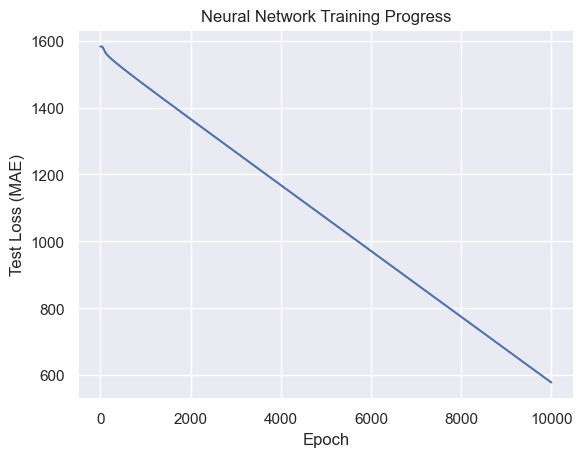

Neural Network R2 score = -3.261319160461426


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare data (assuming 'ssd' DataFrame is defined)
Xnn = ssd.drop(['tensile strength', 'yield strength', 'elongation'], axis=1)
ynn = ssd["tensile strength"].to_numpy()
print('Data Shape= ', Xnn.shape)

# Train-test split
X_train_raw, X_test_raw, y_trainn, y_testn = train_test_split(Xnn, ynn, test_size=0.3, random_state=51)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train_raw)
X_test = sc.transform(X_test_raw)

# Reshape data for LSTM
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert to PyTorch tensors
X_train_nn = torch.tensor(X_train_rnn, dtype=torch.float32)
y_train_nn = torch.tensor(y_trainn, dtype=torch.float32).reshape(-1, 1)
X_test_nn = torch.tensor(X_test_rnn, dtype=torch.float32)
y_test_nn = torch.tensor(y_testn, dtype=torch.float32).reshape(-1, 1)

# Define LSTM Model
class LSTMHarnessModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.2):
        super(LSTMHarnessModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, 
                           hidden_size=hidden_size, 
                           num_layers=num_layers, 
                           batch_first=True, 
                           dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

# Initialize model
input_size = X_train_rnn.shape[2]
hidden_size = 128  # Adjust based on experimentation
num_layers = 2     # Adjust based on experimentation
output_size = 1
dropout_prob = 0.3
model = LSTMHarnessModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

# Loss function and optimizer
lossfn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
train_losses = []
test_losses = []
epochs = 10001

for epoch in range(epochs):
    model.train()
    ypred = model(X_train_nn)
    loss = lossfn(ypred, y_train_nn)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        testpred = model(X_test_nn)
        testloss = lossfn(testpred, y_test_nn)
        test_losses.append(testloss.item())
    
    # Print progress
    if epoch % 1000 == 0:
        print(f"epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss (MAE): {testloss.item():.4f}")

# Plot test loss over epochs
plt.figure()
plt.plot(range(len(test_losses)), test_losses)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MAE)')
plt.title('Neural Network Training Progress')
plt.show()

# Optionally save the plot
# plt.savefig('LSTM_Hardness_Pred.png')

# Evaluation metric (R2 score)
testpred_np = testpred.numpy()
y_test_nn_np = y_test_nn.numpy()
nn_r2_score = r2_score(y_test_nn_np, testpred_np)
print("Neural Network R2 score =", nn_r2_score)

Data Shape=  (312, 14)
epoch: 0 | Train Loss: 2904426.2500 | Test Loss (MSE): 2607775.5000
epoch: 100 | Train Loss: 2885010.5000 | Test Loss (MSE): 2589741.0000
epoch: 200 | Train Loss: 2849020.5000 | Test Loss (MSE): 2555362.5000
epoch: 300 | Train Loss: 2827006.0000 | Test Loss (MSE): 2534063.5000
epoch: 400 | Train Loss: 2806819.7500 | Test Loss (MSE): 2515503.2500
epoch: 500 | Train Loss: 2788640.5000 | Test Loss (MSE): 2498055.2500
epoch: 600 | Train Loss: 2770691.7500 | Test Loss (MSE): 2481269.7500
epoch: 700 | Train Loss: 2754617.0000 | Test Loss (MSE): 2464913.5000
epoch: 800 | Train Loss: 2738300.5000 | Test Loss (MSE): 2448874.5000
epoch: 900 | Train Loss: 2722325.5000 | Test Loss (MSE): 2433065.0000
epoch: 1000 | Train Loss: 2705485.0000 | Test Loss (MSE): 2417472.2500


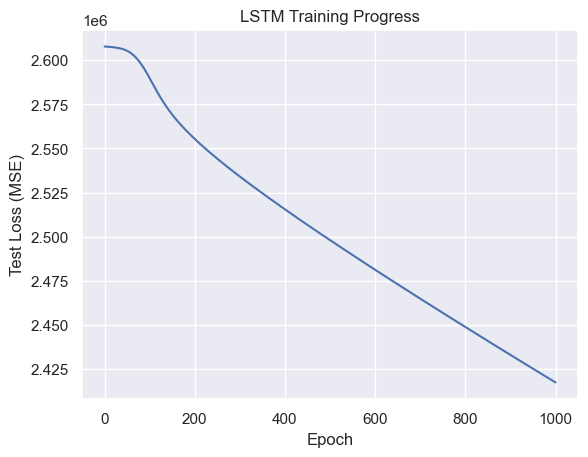

LSTM R2 score = -22.58287239074707


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare data (assuming 'ssd' DataFrame is defined)
Xnn = ssd.drop(['tensile strength', 'yield strength', 'elongation'], axis=1)
ynn = ssd["tensile strength"].to_numpy()
print('Data Shape= ', Xnn.shape)

# Train-test split
X_train_raw, X_test_raw, y_trainn, y_testn = train_test_split(Xnn, ynn, test_size=0.3, random_state=51)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train_raw)
X_test = sc.transform(X_test_raw)

# Reshape data for LSTM
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert to PyTorch tensors
X_train_nn = torch.tensor(X_train_rnn, dtype=torch.float32)
y_train_nn = torch.tensor(y_trainn, dtype=torch.float32).reshape(-1, 1)
X_test_nn = torch.tensor(X_test_rnn, dtype=torch.float32)
y_test_nn = torch.tensor(y_testn, dtype=torch.float32).reshape(-1, 1)

# Define LSTM Model
class LSTMHarnessModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.2):
        super(LSTMHarnessModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, 
                           hidden_size=hidden_size, 
                           num_layers=num_layers, 
                           batch_first=True, 
                           dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

# Initialize model
input_size = X_train_rnn.shape[2]
hidden_size = 64  # Start with fewer units
num_layers = 2
output_size = 1
dropout_prob = 0.3
model = LSTMHarnessModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

# Loss function and optimizer
lossfn = nn.MSELoss()  # Use MSELoss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
train_losses = []
test_losses = []
epochs = 1001

for epoch in range(epochs):
    model.train()
    ypred = model(X_train_nn)
    loss = lossfn(ypred, y_train_nn)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        testpred = model(X_test_nn)
        testloss = lossfn(testpred, y_test_nn)
        test_losses.append(testloss.item())
    
    if epoch % 100 == 0:
        print(f"epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss (MSE): {testloss.item():.4f}")

# Plot test loss over epochs
plt.figure()
plt.plot(range(len(test_losses)), test_losses)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MSE)')
plt.title('LSTM Training Progress')
plt.show()

# Evaluation metric (R2 score)
testpred_np = testpred.numpy()
y_test_nn_np = y_test_nn.numpy()
nn_r2_score = r2_score(y_test_nn_np, testpred_np)
print("LSTM R2 score =", nn_r2_score)
